In [1]:
import sys
import os
current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
from Plots import Centiles_plot, ROC_plot, cumulative_centiles_plot, calibrate_display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
data = pd.read_csv('../data/derivatives/features_train1.csv')

In [3]:
X = data[['distance_goal','angle_goal']]
y = data['is_goal']
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
        )

In [4]:
X1_train = X_train['distance_goal']
X1_val = X_val['distance_goal']

In [5]:
X1_train = X1_train.values.reshape(-1,1)
X1_val = X1_val.values.reshape(-1,1)

y_train = y_train.values.reshape(-1,1)
reshaped_y_val = y_val.values.reshape(-1,1)

In [6]:
clf_1 = LogisticRegression().fit(X1_train, y_train)
y1_pred = clf_1.predict(X1_val)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
print(f'Accuracy = {accuracy_score(y_val, y1_pred)}')
print(f'Matrice de confusion = \n {confusion_matrix(y_val, y1_pred)}')

Accuracy = 0.9062459123610203
Matrice de confusion = 
 [[55426     0]
 [ 5734     0]]


In [8]:
y1_prob = clf_1.predict_proba(X1_val)
print (y1_prob)
# la première colonne est la probabilité que le model ne prédit pas un but pour la ligne d'entrée correspondante
# la deuxieme colonne est la probabilté que le model ne prédit un but pour la ligne d'entrée correspondante

[[0.96612945 0.03387055]
 [0.81085416 0.18914584]
 [0.81446129 0.18553871]
 ...
 [0.8002089  0.1997911 ]
 [0.89720899 0.10279101]
 [0.91438653 0.08561347]]


AUC metric : {'Logistic regression using Distance': 0.696479560582925}


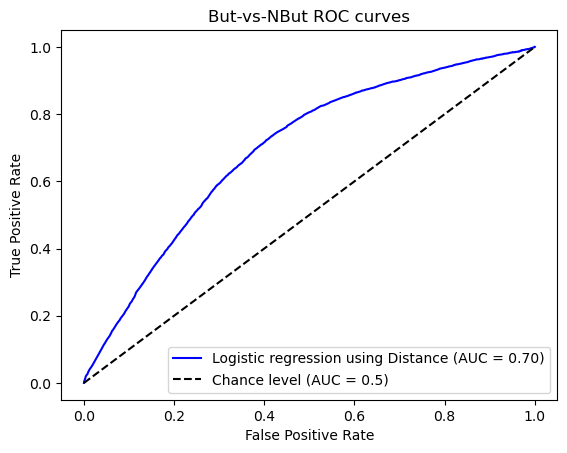

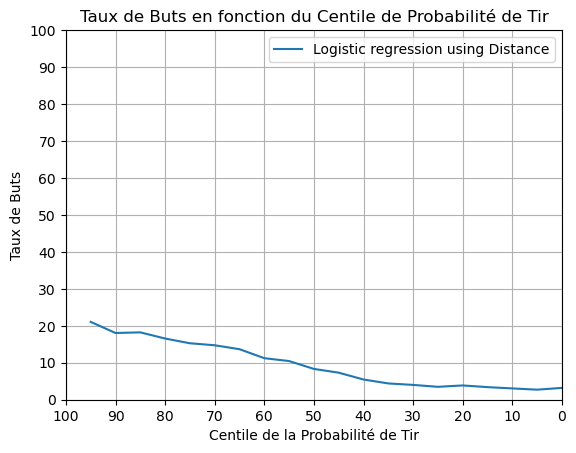

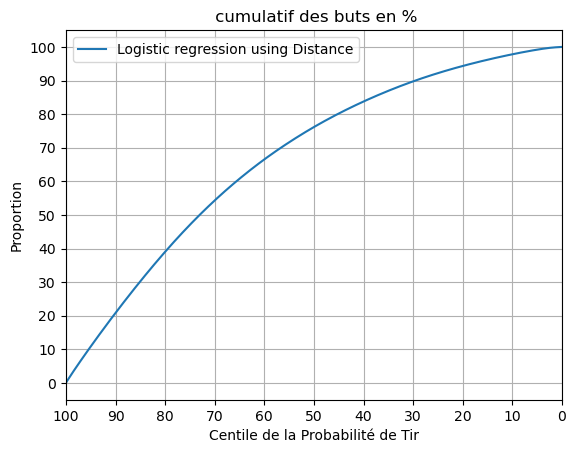

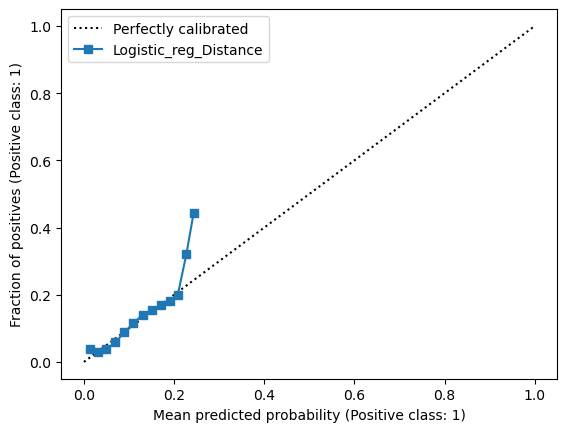

In [9]:
Y=[["Logistic regression using Distance", y1_prob[:,1], "blue", True]]
CLF = [[[clf_1], X1_val, 'Logistic_reg_Distance']]

AUC = ROC_plot(y_val, Y)
Centiles_plot(y_val, Y)
cumulative_centiles_plot(y_val, Y)
calibrate_display(CLF, y_val, n_bin = 50)

In [10]:
X2_train = X_train['angle_goal']
X2_val = X_val['angle_goal']

X2_train = X2_train.values.reshape(-1,1)
X2_val = X2_val.values.reshape(-1,1)

In [11]:
clf_2 = LogisticRegression().fit(X2_train, y_train)
y2_prob = clf_2.predict_proba(X2_val)

clf_3 = LogisticRegression().fit(X_train, y_train)
y3_prob = clf_3.predict_proba(X_val)

c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mouaa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
y_uniform_sampled = np.random.uniform(0, 1, len(y_val))

In [13]:
CLFS = [[[clf_1], X1_val, 'Logistic_reg_Distance'], 
        [[clf_2], X2_val, 'Logistic_reg_Angle'], 
        [[clf_3], X_val, 'Logistic_reg_Distance-Angle'], 
        [[y_val, y_uniform_sampled], X_val, 'Ligne de base aléatoire']
        ]

In [14]:
Ys=[["Logistic regression using Distance", y1_prob[:,1], "blue", False],
   ["Logistic regression using Angle", y2_prob[:,1], "orange", False],
   ["Logistic regression using Distance and Angle", y3_prob[:,1], "green", False],
   ["Ligne de base aléatoire", y_uniform_sampled, "red", True]
   ]


AUC metric : {'Logistic regression using Distance': 0.49530626977745174, 'Logistic regression using Angle': 0.5020579700966246, 'Logistic regression using Distance and Angle': 0.6964502052410217, 'Ligne de base aléatoire': 0.5021310320012274}


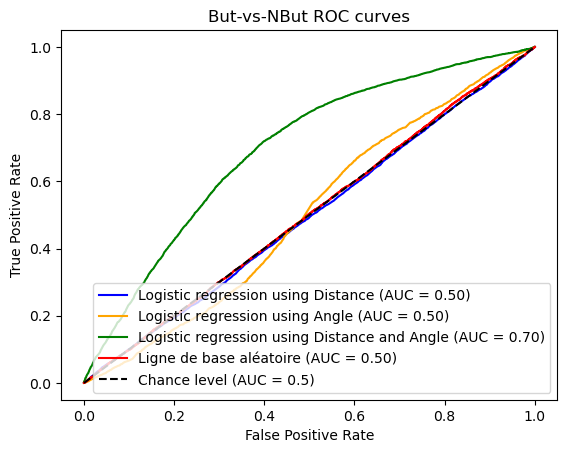

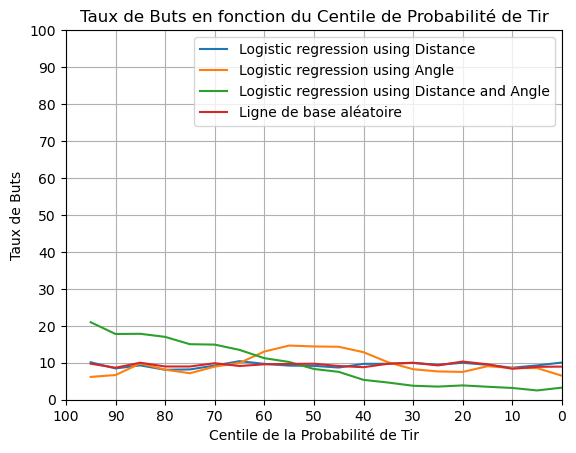

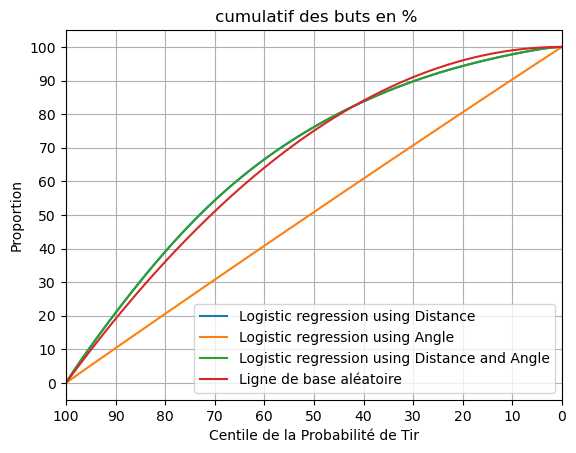

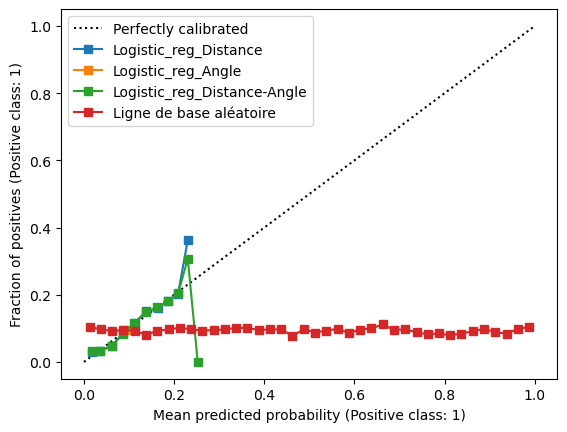

In [15]:
AUCs = ROC_plot(y_val, Ys)
Centiles_plot(y_val, Ys)
cumulative_centiles_plot(y_val, Ys)
calibrate_display(CLFS, y_val, n_bin = 40)